This notebook will do EDA to help answer some questions and further refine others.
EDA topics:
   1) price vs year sold -- groupby year sold, average price
   2) price vs zipcode -- groupby zipcode, average price
   3) price vs year built -- groupby year, average price
   4) price vs zestimate -- line chart
   5) price vs days on zillow (recently sold only) -- histogram
   6) number of outliers of price (calculate IQR and get values beyond)
   7) average(price/zestimate) vs zipcode (recently sold only) -- line graph (shows value over/under per zipcode)
   8) days on zillow vs pageviews and favorites
   9) pageviews and favorites vs price/zestimate

In [59]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator

pd.options.display.max_columns = None

In [60]:
df_forSale = pd.read_csv('cleaned_forSale_data.csv', index_col=0)
df_recentlySold = pd.read_csv('cleaned_recentlySold_data.csv', index_col=0)

df_recentlySold['dateSold'] = pd.to_datetime(df_recentlySold['dateSoldString'])
df_recentlySold.drop('dateSoldString', axis=1, inplace=True)

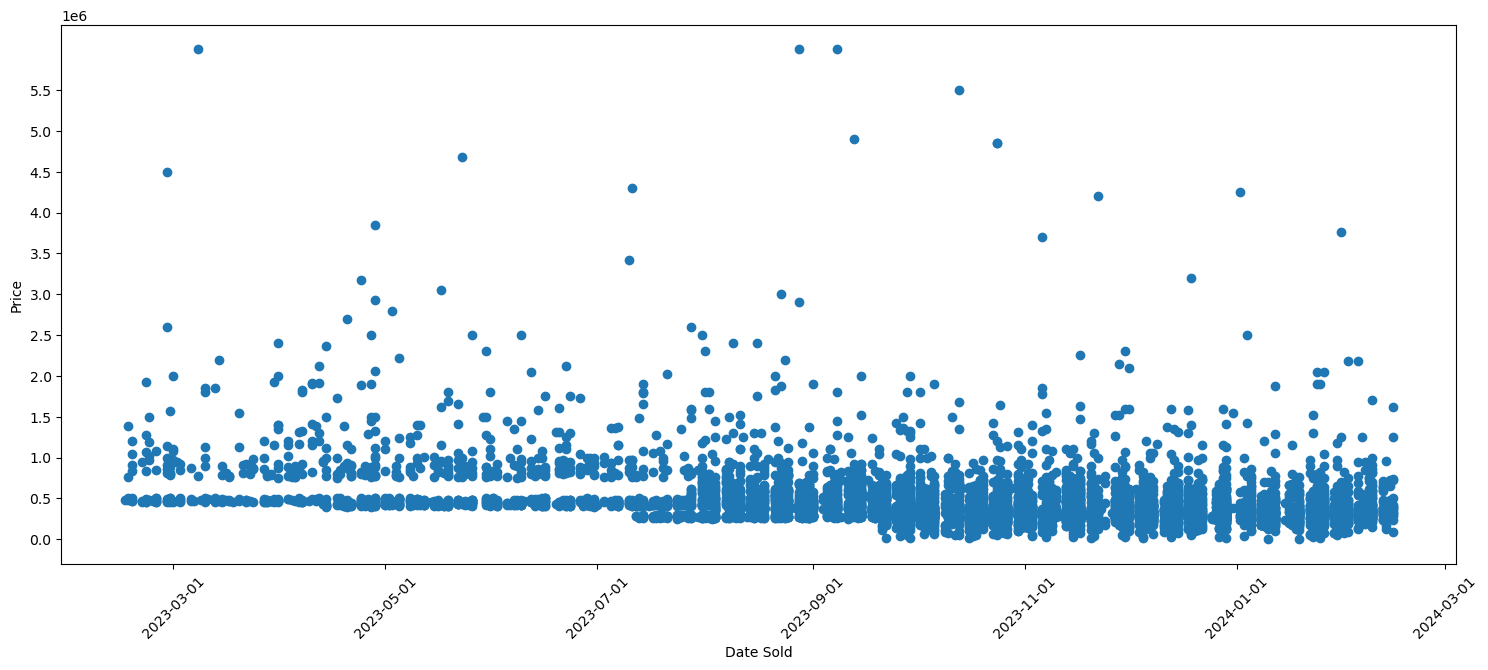

In [64]:
# Plot price per year sold on scatter plot
fig, ax = plt.subplots(figsize =(18, 7))
ax.scatter(x=df_recentlySold['dateSold'], y=df_recentlySold['price'])

'''
# Set the locator
locator = mdates.YearLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
# plt.plot(date_list,y)
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
'''

# Set the frequency of x-axis ticks (e.g., every 7 days)
ax.xaxis.set_major_locator(AutoDateLocator(interval_multiples=True))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.yticks(np.arange(df_recentlySold['price'].min(), df_recentlySold['price'].max(), 500000))

plt.ylabel('Price')
plt.xlabel('Date Sold')
plt.show()